# Example 1: Making grid objects

`PlateFlex` comes equipped with a number of useful grid classes that all inherit from a parent `Grid` class. This class contains methods for loading 2D data, making contours based on the data, calculating the wavelet transform and scalogram, and plotting the grid, wavelet transform and scalograms. Here we will explore how to load data from a three-column `.xyz` file and plot the data.

Start by importing the necessary modules - here we use the parent `Grid` class for illustration

In [1]:
import numpy as np
import pandas as pd
from plateflex import Grid

The data that we will load is in fact topography data of the North American continent from ETOPO1. This file was obtained separately using GMT. Check out the wiki page on GitHub for more details on data preparation. Note that the `Grid` class only requires a rectangular (or square) 2D array of data and specification of the sampling distance in the x- and y-directions. 

In [2]:
# Read header (first line) of data set to get grid parameters
xmin, xmax, ymin, ymax, zmin, zmax, dx, dy, nx, ny = \
pd.read_csv('../data/Topo_NA.xyz', sep='\t', nrows=0).columns[1:].values.astype(float)

# Change type of nx and ny to integers
nx = int(nx); ny = int(ny)

Now we can read the data using `pandas`:

In [3]:
# Read data 
topodata = pd.read_csv('../data/Topo_NA.xyz', sep='\t', \
    skiprows=1, names=['x', 'y', 'z'])['z'].values.reshape(ny,nx)[::-1]

Once the 2D array is is memory, we can initialize a `Grid` object

In [4]:
# Load the data as `plateflex` Grid object
topo = Grid(topodata, dx, dy)

You can get help to read the docstring:

In [5]:
help(topo)

Help on Grid in module plateflex.classes object:

class Grid(builtins.object)
 |  Grid(grid, dx, dy)
 |  
 |  An object containing a 2D array of data and Cartesian coordinates specifying the
 |  bounding box of the array. Contains methods to calculate the wavelet transform, 
 |  wavelet scalogram and to plot those quantities at a specified wavenumber index.
 |  
 |  :type grid: :class:`~numpy.ndarray`
 |  :param grid: 2D array of of topography/gravity data
 |  :type dx: float
 |  :param dx: Grid spacing in the x-direction (km)
 |  :type dy: float
 |  :param dy: Grid spacing in the y-direction (km)
 |  
 |  Grid must be projected in km.
 |  
 |  .. rubric:: Default Attributes
 |  
 |  ``data`` : :class:`~numpy.ndarray`
 |      2D array of topography/gravity data (shape (`nx,ny`))
 |  ``dx`` : float 
 |      Grid spacing in the x-direction in km
 |  ``dy`` : float 
 |      Grid spacing in the y-direction in km
 |  ``nx`` : int 
 |      Number of grid cells in the x-direction
 |  ``ny`` :

And you can check which attributes are available:

In [6]:
topo.__dict__

{'nx': 342,
 'ny': 341,
 'dx': 20.0169157785,
 'dy': 19.9970844654,
 'units': None,
 'sg_units': None,
 'logsg_units': None,
 'title': None,
 'ns': 19,
 'k': array([2.60106395e-06, 3.22337138e-06, 3.99456654e-06, 4.95027100e-06,
        6.13462882e-06, 7.60234554e-06, 9.42121512e-06, 1.16752513e-05,
        1.44685680e-05, 1.79301889e-05, 2.22200064e-05, 2.75361676e-05,
        3.41242261e-05, 4.22884849e-05, 5.24060517e-05, 6.49442575e-05,
        8.04822429e-05, 9.97377085e-05, 1.23600066e-04]),
 'data': array([[-4773.43994141, -4770.30712891, -4736.65576172, ...,
         -3779.10644531, -3609.01147461, -4773.43994141],
        [-4778.16992188, -4795.12939453, -4804.34228516, ...,
         -3775.15356445, -3628.46166992, -4778.16992188],
        [-4829.92382812, -4865.66894531, -4797.75439453, ...,
         -3748.75512695, -3561.30175781, -4829.92382812],
        ...,
        [  -45.76174164,   -38.02427292,   -21.88285637, ...,
         -2385.19848633, -2406.828125  ,   -45.7617416

There's a few things to notice at this point. 
* The grid parameters (`nx`, `ny`, `dx`, `dy`) are always available from a `Grid` object. You can extract their value using, e.g., `topo.nx`
* The `data` attribute is a 2D numpy array of shape (`nx`, `ny`). You can check this with `topo.data.shape`. 
* The `k` attribute is the optimal set of adjacent equivalent wavelet wavenumbers corresponding to the grid parameters. It is automatically calculated during initialization.
* The attributes `units`, `sg_units`, `logsg_units` and `title` are set to `None`, since we are using the parent `Grid` class. Derived classes (e.g., `TopoGrid` will have default values for those fields.

The next logical thing to do is to plot the grid object. This is a simple one line:

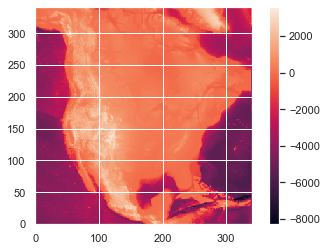

In [7]:
topo.plot()

The plot uses `pyplot.imshow` to render a colored map of the topography data with a colorbar. To check which arguments are set by default, type

In [8]:
help(topo.plot)

Help on method plot in module plateflex.classes:

plot(mask=None, title=None, save=None, clabel=None, contours=None, **kwargs) method of plateflex.classes.Grid instance



At this point you could either add a title, save the plot or add a label on the colorbar. All `matplotlib.pyplot.imshow` keyword arguments are also available through the `**kwargs` entries. 

Now, let's beautify the map . We can start by extracting the land-ocean contours directly from the object.

In [9]:
# Create contours
contours = topo.make_contours(0.)

We can also make a mask over deep ocean basins. Later, such a mask will determine if the analysis is performed over those grid cells.

In [10]:
# Make mask 
mask = (topo.data < -500.)

Now, make new plot 

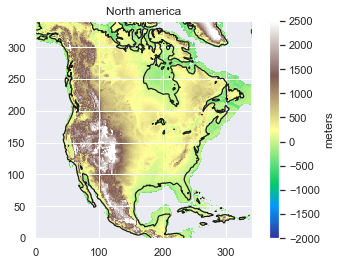

In [11]:
topo.plot(mask=mask, contours=contours, title='North america', clabel='meters', cmap='terrain', vmin=-2000, vmax=2500)

Voilà! 

Now go to Example 2 to examine the wavelet transform and scalogram.